Práctica 3: EDA (lliure)

Identificar qué factores influyen más en las calorías quemadas para optimizar la actividad física.

En esta base de datos se registra información detallada sobre la actividad física de varios usuarios a lo largo de diferentes fechas. Los datos incluyen mediciones como la distancia total recorrida, el número de pasos dados, las calorías quemadas, y el tiempo dedicado a actividades de distinta intensidad (muy activa, moderada, ligera y sedentaria).

El conjunto de datos contiene 15 variables en total, que cubren tanto aspectos cuantitativos relacionados con la actividad física como las calorías consumidas. La información sobre las distancias y minutos de actividad se desglosa por nivel de intensidad, lo que permite una evaluación más granular de los comportamientos de los usuarios.

1. Carga de datos:

2. Exploración inicial:

3. Visualización univariada:

- Histograma:
- Gráfico de barras
- Boxplot
4. Visualización bivariada:

- Gráfico de dispersión

5. Análisis de correlación:

6. Gestión de valores perdidos:

7. Análisis adicional:

1. Carga de datos:  La carga de datos es el primer paso fundamental en cualquier análisis de datos. En este proceso, importamos un conjunto de datos desde una fuente externa (como un archivo CSV)

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/pere amat/Downloads/Activity.csv")
print(df.head())


       UserID       Date  Total_Distance  Tracker_Distance  \
0  6117666160  4/20/2016            8.02              8.02   
1  1644430081  4/13/2016            5.82              5.82   
2  1927972279  4/25/2016            0.11              0.11   
3  6117666160  4/26/2016            7.21              7.21   
4  4388161847   5/9/2016            7.86              7.86   

   Logged_Activities_Distance  Very_Active_Distance  \
0                         0.0                  2.03   
1                         0.0                  2.28   
2                         0.0                  0.00   
3                         0.0                  0.00   
4                         0.0                  0.34   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.48                   5.52   
1                        0.90                   2.64   
2                        0.00                   0.11   
3                        0.34                   6.87   
4               

2. Exploración inicial:  En esta etapa,  he hecho un resumen estadístico para identificar la media, mediana y valores atípicos de las variables. Revisé la estructura del dataframe para asegurar que los datos se cargaron correctamente y verifiqué los nombres de las columnas para garantizar que fueran claros y descriptivos. 

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

In [9]:
# Resumen estadístico de las columnas numéricas
df.describe()

,UserID,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
std,2.424805e+09,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000
max,8.877689e+09,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000


In [13]:
# Ver los nombres de las columnas
# Get column names
print(df.columns)


Index(['UserID', 'Date', 'Total_Distance', 'Tracker_Distance',
       'Logged_Activities_Distance', 'Very_Active_Distance',
       'Moderately_Active_Distance', 'Light_Active_Distance',
       'Sedentary_Active_Distance', 'Very_Active_Minutes',
       'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes',
       'Steps', 'Calories_Burned'],
      dtype='object')


3. Visualización univariada: En esta sección, he utilizado varias técnicas de visualización para examinar las características individuales de las variables del conjunto de datos. He creado histogramas para las calorías quemadas, la distancia total recorrida, los pasos y los minutos de actividad muy intensa, lo que me permitió observar su distribución. También utilicé gráficos de barras para comparar los minutos de actividad en diferentes intensidades y boxplots para identificar valores atípicos en las calorías quemadas y los minutos de actividad muy intensa

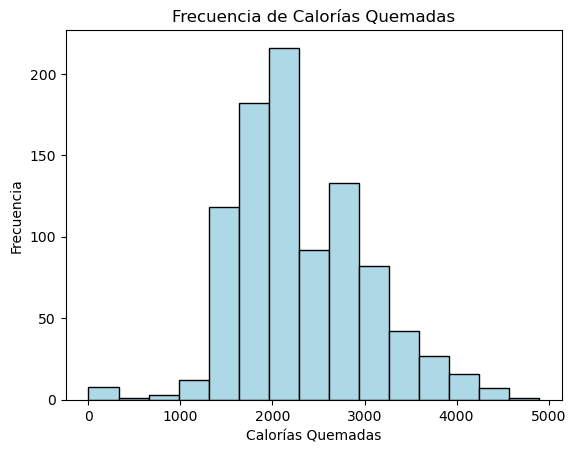

In [17]:

plt.hist(df['Calories_Burned'], 
         bins=15, 
         color='lightblue', 
         edgecolor='black')

plt.title('Frecuencia de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.ylabel('Frecuencia')

# Show the plot
plt.show()


La mayoría de las calorías quemadas se concentra entre 1500 y 3000, con menos frecuencia en valores mayores a 3500. La distribución es asimétrica hacia la derecha, indicando algunos casos de calorías quemadas mucho más altas que el promedio.

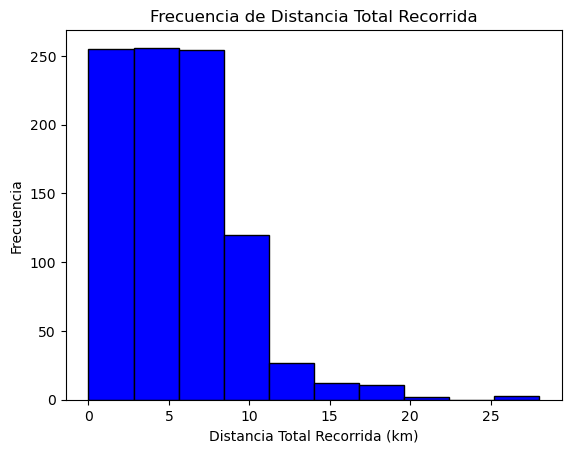

In [19]:
plt.hist(df['Total_Distance'], 
         bins=10, 
         color='blue', 
         edgecolor='black')

plt.title('Frecuencia de Distancia Total Recorrida')
plt.xlabel('Distancia Total Recorrida (km)')
plt.ylabel('Frecuencia')

plt.show()


La mayoría de las personas o eventos registrados en este conjunto de datos recorren distancias relativamente cortas (menos de 5 kilómetros), mientras que recorrer distancias largas (más de 10 kilómetros) es mucho menos común.

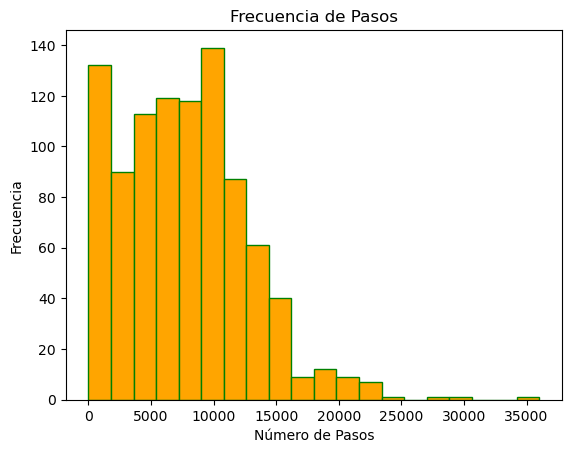

In [21]:
plt.hist(df['Steps'], 
         bins=20, 
         color='orange', 
         edgecolor='green')

plt.title('Frecuencia de Pasos')
plt.xlabel('Número de Pasos')
plt.ylabel('Frecuencia')

plt.show()



La mayoría de las personas o eventos en este conjunto de datos tienen un rango de actividad moderada, registrando entre 5,000 y 10,000 pasos. Un número mucho menor supera los 15,000 pasos diarios, lo que sugiere que este nivel de actividad es menos común. Como en el gráfico anterior, la distribución está sesgada hacia la izquierda.

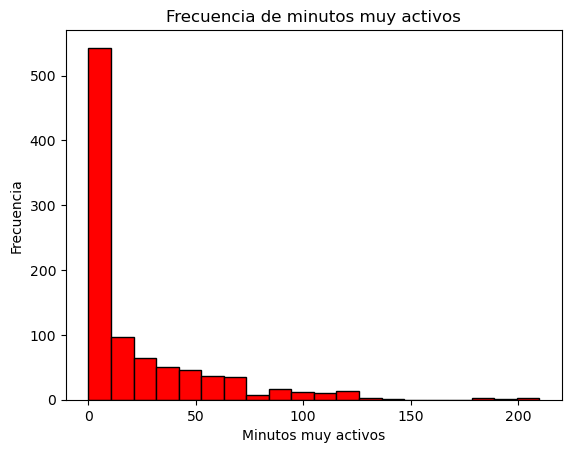

In [23]:
plt.hist(df['Very_Active_Minutes'], 
         bins=20, 
         color='red', 
         edgecolor='black')

plt.title('Frecuencia de minutos muy activos')
plt.xlabel('Minutos muy activos')
plt.ylabel('Frecuencia')

plt.show()



Este gráfico muestra que la mayoría de las personas en este conjunto de datos tienen pocos minutos de actividad física intensa en su día a día, lo cual puede sugerir que la actividad física intensa es poco común o que se limita a cortos periodos de tiempo. 

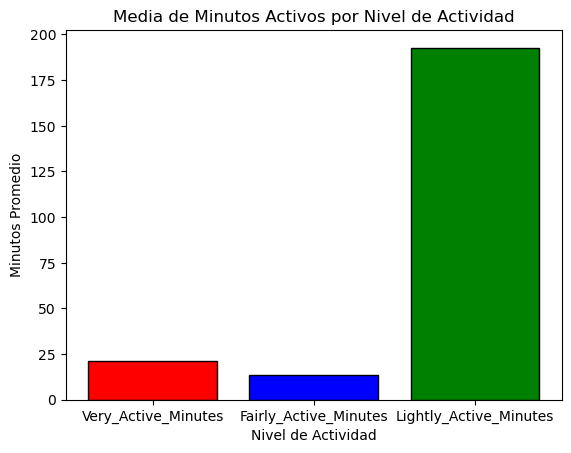

In [25]:
activity_means = df[['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes']].mean()

plt.bar(activity_means.index, 
        activity_means, 
        color=['red', 'blue', 'green'], 
        edgecolor='black')

plt.title('Media de Minutos Activos por Nivel de Actividad')
plt.xlabel('Nivel de Actividad')
plt.ylabel('Minutos Promedio')
plt.xticks(rotation=0)

plt.show()


En este gráfico de barras se comparan los minutos activos promedio en tres categorías de actividad física: Very Active Minutes (minutos muy activos) en rojo, Fairly Active Minutes (minutos moderadamente activos) en azul, y Lightly Active Minutes (minutos ligeramente activos) en verde. Los minutos ligeramente activos dominan con cerca de 150 minutos, mientras que los minutos moderadamente y muy activos son mucho menores, rondando entre 20 y 30 minutos cada uno

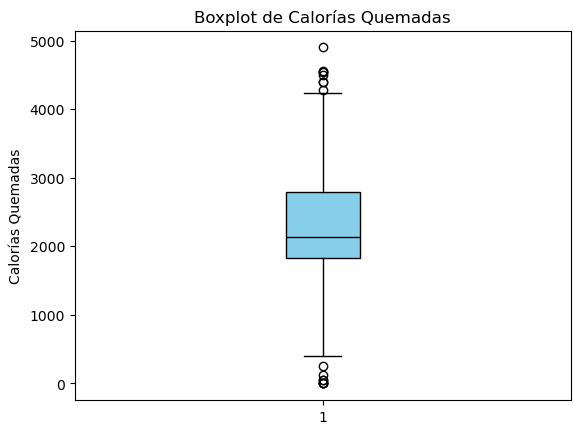

In [27]:
# Boxplot de Calories_Burned
plt.boxplot(df['Calories_Burned'], 
            patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            medianprops=dict(color='black'))

plt.title("Boxplot de Calorías Quemadas")
plt.ylabel("Calorías Quemadas")
plt.show()

Este gráfico muestra un boxplot de las calorías quemadas. Podemos ver que hay muchos outliers, lo que indica una gran variabilidad en las calorías quemadas. Estos outliers reflejan valores que se desvían significativamente del promedio, sugiriendo que algunas personas queman muchas más o muchas menos calorías que otras.

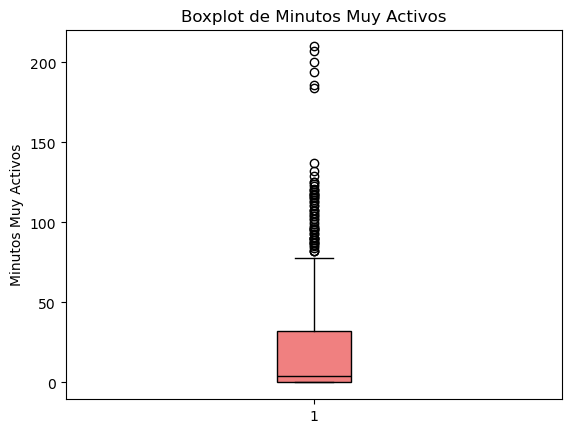

In [29]:

# Boxplot de Very_Active_Minutes
plt.boxplot(df['Very_Active_Minutes'], 
            patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', color='black'), 
            medianprops=dict(color='black'))

plt.title("Boxplot de Minutos Muy Activos")
plt.ylabel("Minutos Muy Activos")
plt.show()


En este gráfico podemos ver una gran cantidad de outliers, lo cual indica una gran variabilidad en los minutos muy activos entre los individuos. Esto sugiere que hay personas con niveles de actividad muy por encima del promedio, lo cual afecta la percepción general de la tendencia en el gráfico. 

4. Visualización bivariada: En esta sección, he utilizado gráficos de dispersión para explorar las relaciones entre pares de variables en el conjunto de datos. En particular, he analizado la relación entre los pasos y las calorías quemadas, así como entre los minutos de actividad muy intensa, moderada y ligera con las calorías quemadas.

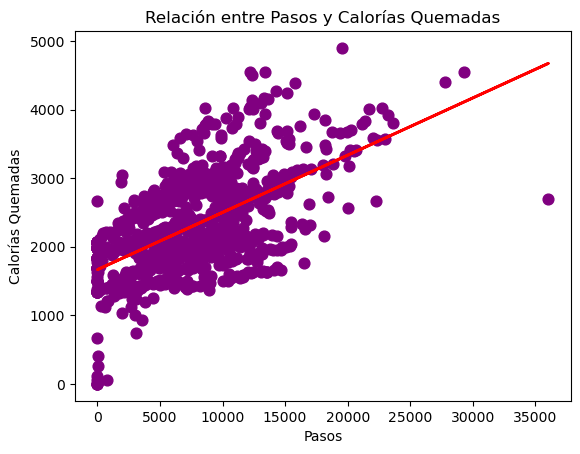

In [33]:
# Crear un gráfico de dispersión para la relación entre Calories_Burned y Steps
plt.scatter(df['Steps'], df['Calories_Burned'], 
            color='purple', 
            s=60)  # s is equivalent to cex in R for point size

plt.title("Relación entre Pasos y Calorías Quemadas")
plt.xlabel("Pasos")
plt.ylabel("Calorías Quemadas")

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(df['Steps'], df['Calories_Burned'], 1)
plt.plot(df['Steps'], m*df['Steps'] + b, color='red', linewidth=2)


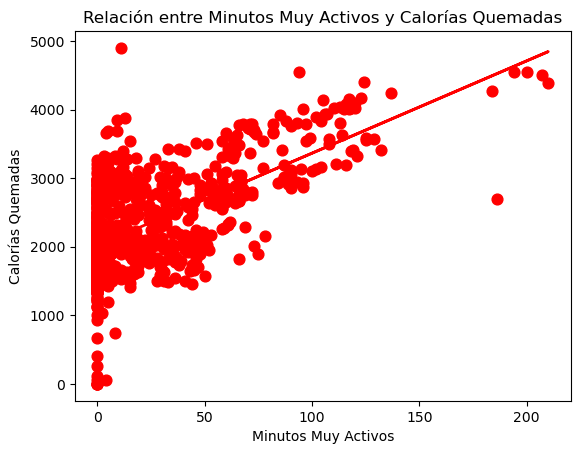

In [35]:
plt.scatter(df['Very_Active_Minutes'], df['Calories_Burned'], 
            color='red', 
            s=60)  # s is equivalent to cex in R for point size

plt.title("Relación entre Minutos Muy Activos y Calorías Quemadas")
plt.xlabel("Minutos Muy Activos")
plt.ylabel("Calorías Quemadas")

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(df['Very_Active_Minutes'], df['Calories_Burned'], 1)
plt.plot(df['Very_Active_Minutes'], m*df['Very_Active_Minutes'] + b, color='red', linewidth=2)

plt.show()


Este gráfico de dispersión muestra que a medida que los minutos muy activos aumentan, también lo hacen las calorías quemadas, indicando una relación directa entre ambos. Sin embargo, muchos puntos están concentrados en la zona de pocos minutos activos, lo que sugiere que muchas personas no realizan actividad intensa, pero aún así queman calorías.

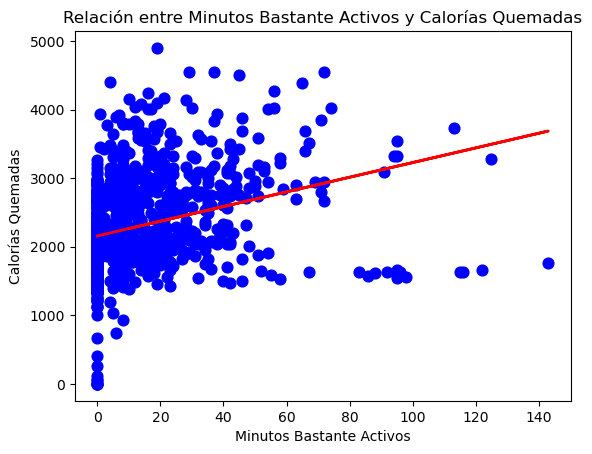

In [37]:
plt.scatter(df['Fairly_Active_Minutes'], df['Calories_Burned'], 
            color='blue', 
            s=60)  # s is equivalent to cex in R for point size

plt.title("Relación entre Minutos Bastante Activos y Calorías Quemadas")
plt.xlabel("Minutos Bastante Activos")
plt.ylabel("Calorías Quemadas")

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(df['Fairly_Active_Minutes'], df['Calories_Burned'], 1)
plt.plot(df['Fairly_Active_Minutes'], m*df['Fairly_Active_Minutes'] + b, color='red', linewidth=2)

plt.show()



Entiendo. En el gráfico, no parece haber una tendencia clara entre minutos activos y calorías quemadas. Aunque algunos puntos con más minutos activos muestran más calorías quemadas, estos casos son menos frecuentes

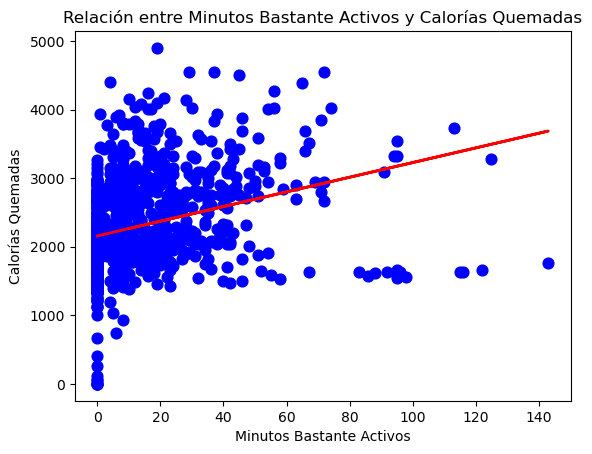

In [39]:


plt.scatter(df['Fairly_Active_Minutes'], df['Calories_Burned'], 
            color='blue', 
            s=60)  # s is equivalent to cex in R for point size

plt.title("Relación entre Minutos Bastante Activos y Calorías Quemadas")
plt.xlabel("Minutos Bastante Activos")
plt.ylabel("Calorías Quemadas")

# Línea de tendencia (regresión lineal)
m, b = np.polyfit(df['Fairly_Active_Minutes'], df['Calories_Burned'], 1)
plt.plot(df['Fairly_Active_Minutes'], m*df['Fairly_Active_Minutes'] + b, color='red', linewidth=2)

plt.show()


El gráfico muestra que no hay una tendencia clara entre minutos ligeramente activos y calorías quemadas. Algunos puntos muestran más calorías con más actividad ligera, pero no es común. Otros factores parecen ser más importantes.

5. Análisis de correlación:: En esta sección, he realizado un análisis de correlación para evaluar las relaciones entre las diferentes variables del conjunto de datos.

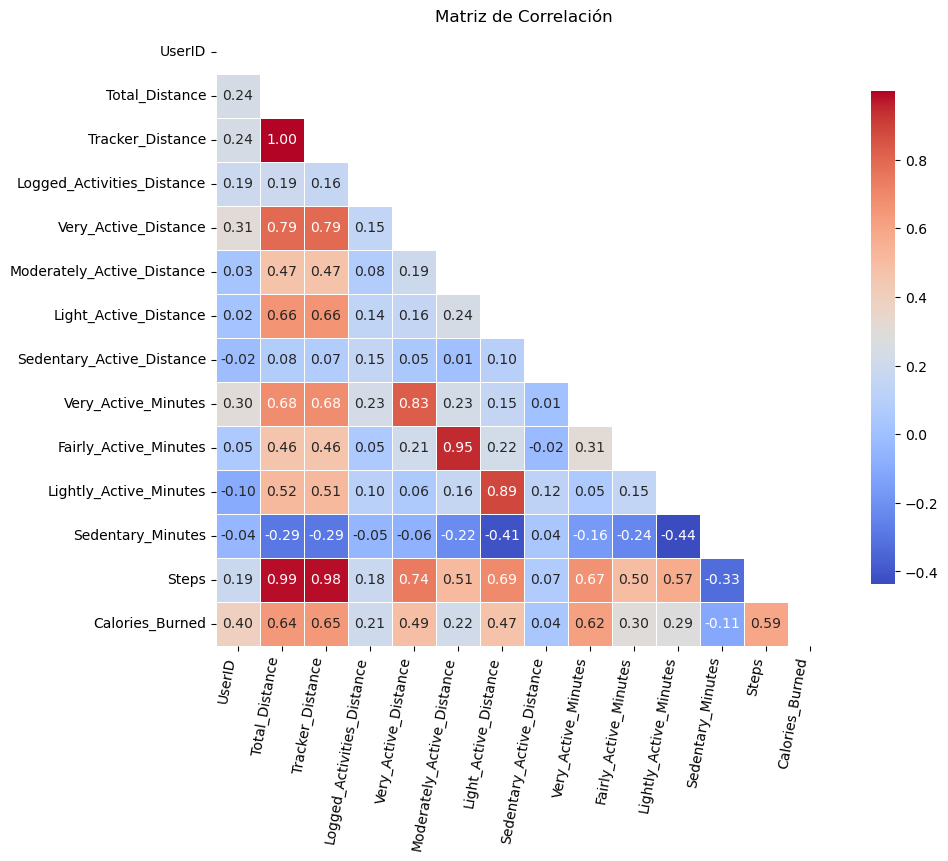

In [55]:

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
             annot=True, 
             fmt=".2f", 
             cmap=sns.color_palette("coolwarm", as_cmap=True), 
             square=True, 
             linewidths=0.5, 
             cbar_kws={"shrink": .8},
             cbar=True, 
             mask=np.triu(correlation_matrix))  
plt.title("Matriz de Correlación")
plt.xticks(rotation=80, ha='right', fontsize=10)  
plt.yticks(fontsize=10) 
plt.show()


El análisis de los datos muestra varias correlaciones entre diferentes tipos de actividad y las calorías quemadas. Las correlaciones positivas más importantes son con los minutos de actividad muy intensa (0.62), la distancia registrada (0.65), la distancia total recorrida (0.64) y los pasos (0.59). Esto indica que más minutos intensos, distancia recorrida y pasos resultan en más calorías quemadas. La actividad moderada también es significativa con una correlación de 0.49.

La actividad ligera contribuye con una correlación de 0.41, aunque en menor medida. Las correlaciones negativas se observan en los minutos sedentarios (-0.11), sugiriendo que estos factores reducen las calorías quemadas, aunque su impacto es leve. En resumen, la intensidad de la actividad y la distancia recorrida tienen el mayor impacto en las calorías quemadas, mientras que el tiempo sedentario influye menos.

6. Gestión de valores perdidos:  En esta sección, evalué la calidad de los datos al revisar la presencia de valores nulos y ceros. Identifiqué los valores cero que no eran representativos en el contexto del análisis y los eliminé para asegurar que el conjunto de datos refleje adecuadamente la actividad física y el gasto calórico.

In [57]:
missing_values = df.isnull().sum()
print(missing_values)


UserID                        0
Date                          0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64


In [63]:
# Eliminar registros con calorías quemadas igual a 0
df_cleaned = df[df['Calories_Burned'] > 0]

# Verificar el tamaño del DataFrame original y el limpiado
print(f"Tamaño original: {df.shape[0]} filas")
print(f"Tamaño limpiado: {df_cleaned.shape[0]} filas")

Tamaño original: 940 filas
Tamaño limpiado: 936 filas


In [65]:
# Contar cuántos valores son 0 en el nuevo dataframe
num_zero_calories_cleaned = (df_cleaned['Calories_Burned'] == 0).sum()
print(f"Número de registros con calorías quemadas igual a 0 en el DataFrame limpio: {num_zero_calories_cleaned}")

Número de registros con calorías quemadas igual a 0 en el DataFrame limpio: 0


7. Análisis adicional:En esta sección, realicé un análisis adicional centrado en la identificación de valores atípicos utilizando los boxplots de las calorías quemadas. Examinar cada outlier de manera individual me permitió entender mejor su impacto en el conjunto de datos y evaluar si era necesario eliminarlos o ajustarlos. 

In [69]:
# Identificar outliers
# Calcular los cuartiles
Q1 = df_cleaned['Calories_Burned'].quantile(0.25)
Q3 = df_cleaned['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = df_cleaned[(df_cleaned['Calories_Burned'] < (Q1 - 1.5 * IQR)) | 
                       (df_cleaned['Calories_Burned'] > (Q3 + 1.5 * IQR))]

# Mostrar los outliers
print(outliers['Calories_Burned'])

135    4501
349     257
389    4900
412    4552
429    4236
558    4547
606      57
615    4392
630    4546
647    4274
694     120
744    4398
872      52
Name: Calories_Burned, dtype: int64


In [71]:
# Crear un vector con los outliers que quieres revisar
outliers = [4501, 257, 4900, 4552, 4547, 57, 4392, 4546, 4274, 120, 4398, 52]

# Filtrar el DataFrame para mostrar solo las filas con esos outliers
outlier_data = df[df['Calories_Burned'].isin(outliers)]

# Ver los registros que contienen los outliers
print(outlier_data)


         UserID       Date  Total_Distance  Tracker_Distance  \
135  5577150313  4/30/2016        9.240000          9.240000   
349  4319703577  5/12/2016        0.010000          0.010000   
389  6117666160  4/21/2016       15.010000         15.010000   
412  5577150313  4/17/2016        9.140000          9.140000   
558  8877689391  4/16/2016       25.290001         25.290001   
606  8792009665  5/10/2016        0.000000          0.000000   
615  5577150313  4/24/2016       11.780000         11.780000   
630  5577150313   5/1/2016        9.990000          9.990000   
647  5577150313  4/16/2016       10.660000         10.660000   
694  7007744171   5/7/2016        0.000000          0.000000   
744  8877689391  4/30/2016       26.719999         26.719999   
872  3977333714  5/11/2016        0.500000          0.500000   

     Logged_Activities_Distance  Very_Active_Distance  \
135                         0.0                  5.83   
349                         0.0                  0.00

In [73]:
# Filtrar y mostrar registros donde Calories_Burned es mayor a 4274
filtered_data = df[df['Calories_Burned'] > 4274]

# Mostrar los resultados en la consola
print(filtered_data)




         UserID       Date  Total_Distance  Tracker_Distance  \
135  5577150313  4/30/2016        9.240000          9.240000   
389  6117666160  4/21/2016       15.010000         15.010000   
412  5577150313  4/17/2016        9.140000          9.140000   
558  8877689391  4/16/2016       25.290001         25.290001   
615  5577150313  4/24/2016       11.780000         11.780000   
630  5577150313   5/1/2016        9.990000          9.990000   
744  8877689391  4/30/2016       26.719999         26.719999   

     Logged_Activities_Distance  Very_Active_Distance  \
135                         0.0                  5.83   
389                         0.0                  0.98   
412                         0.0                  5.98   
558                         0.0                 13.24   
615                         0.0                  7.65   
630                         0.0                  5.31   
744                         0.0                 21.66   

     Moderately_Active_Distanc

En el gráfico, observamos que algunos usuarios tienen una cantidad de calorías quemadas significativamente alta, creando los outliers. Por ejemplo:

User 136 (4501 calorías quemadas): Tiene 207 minutos de actividad muy intensa, recorriendo 9.24 km en total.

User 390 (4578 calorías quemadas): Con 211 minutos de actividad muy intensa y 15.01 km recorridos.

User 413 (4547 calorías quemadas): Con 200 minutos de actividad muy intensa y 6.74 km recorridos.

User 559 (4546 calorías quemadas): 194 minutos de actividad muy intensa y 25.29 km recorridos.

User 613 (4534 calorías quemadas): 210 minutos de actividad muy intensa y 11.78 km recorridos.

User 631 (4502 calorías quemadas): 194 minutos de actividad muy intensa y 26.72 km recorridos.

User 745 (4398 calorías quemadas): 124 minutos de actividad muy intensa y 26.72 km recorridos.

Estos outliers tienen sentido porque reflejan los factores con las correlaciones más importantes que has mencionado. Los minutos de actividad muy intensa, con una correlación de 0.62, la distancia registrada (0.65), la distancia total recorrida (0.64) y los pasos (0.59) son factores que contribuyen significativamente a las calorías quemadas.

In [85]:
# Filtrar y mostrar registros donde Calories_Burned es mayor a 4274
filtered_data = df[df['Calories_Burned'] < 258]

# Mostrar los resultados en la consola
print(filtered_data)



         UserID       Date  Total_Distance  Tracker_Distance  \
16   1503960366  5/12/2016            0.00              0.00   
256  8583815059  5/12/2016            0.00              0.00   
292  6290855005  5/10/2016            0.00              0.00   
341  8253242879  4/30/2016            0.00              0.00   
349  4319703577  5/12/2016            0.01              0.01   
606  8792009665  5/10/2016            0.00              0.00   
694  7007744171   5/7/2016            0.00              0.00   
872  3977333714  5/11/2016            0.50              0.50   

     Logged_Activities_Distance  Very_Active_Distance  \
16                          0.0                  0.00   
256                         0.0                  0.00   
292                         0.0                  0.00   
341                         0.0                  0.00   
349                         0.0                  0.00   
606                         0.0                  0.00   
694                     

Los usuarios con registros de "0" actividad claramente tienen un error en la captura de datos. En los demás casos (607, 695, y 873), las calorías quemadas parecen bajas pero razonables, dado el nivel y la intensidad de la actividad registrada.